In [1]:
import numpy as np
from tensorflow.keras.models import Sequential # 케라스의 Sequential()을 임포트
from tensorflow.keras.layers import Dense # 케라스의 Dense()를 임포트
from tensorflow.keras import optimizers # 케라스의 옵티마이저를 임포트

X=np.array([-50, -40, -30, -20, -10, -5, 0, 5, 10, 20, 30, 40, 50])
y=np.array([0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1]) #숫자 10부터 1

model=Sequential()
model.add(Dense(1, input_dim=1, activation='sigmoid'))
sgd=optimizers.SGD(lr=0.01)
model.compile(optimizer=sgd ,loss='binary_crossentropy',metrics=['binary_accuracy'])
# 옵티마이저는 경사하강법의 일종인 확률적 경사 하강법 sgd를 사용합니다.
# 손실 함수(Loss function)는 binary_crossentropy(이진 크로스 엔트로피)를 사용합니다.
model.fit(X,y, batch_size=1, epochs=200, shuffle=False)
# 주어진 X와 y데이터에 대해서 오차를 최소화하는 작업을 200번 시도합니다.

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Train on 13 samples
Epoch 1/200
13/13 [==============================] - 0s 21ms/sample - loss: 1.7905 - binary_accuracy: 0.8462
Epoch 2/200
13/13 [==============================] - 0s 1ms/sample - loss: 0.2078 - binary_accuracy: 0.9231
Epoch 3/200
13/13 [==============================] - 0s 1ms/sample - loss: 0.2035 - binary_accuracy: 0.9231
Epoch 4/200
13/13 [==============================] - 0s 1ms/sample - loss: 0.2010 - binary_accuracy: 0.9231
Epoch 5/200
13/13 [==============================] - 0s 1ms/sample - loss: 0.1990 - binary_accuracy: 0.9231
Epoch 6/200
13/13 [==============================] - 0s 2ms/sample - loss: 0.1973 - binary_accuracy: 0.9231
Epoch 7/200
13/13 [==============================] - 0s 2ms/sample - loss: 0.1956 - binary_accuracy: 0.9231
Epoch 8/200
13/13 [=============================

임의의 숫자들의 나열을 X라고 하였을 때, 숫자 10 이상인 경우에는 1, 미만인 경우에는 0을 부여한 레이블 데이터를 y라고 해봅시다. 이번 데이터는 앞서 배운 단순 선형 회귀때와 마찬가지로 1개의 실수인 X로부터 1개의 실수인 y를 예측하는 맵핑 관계를 가지므로 각각 1을 기재합니다. 또한 시그모이드 함수를 사용할 것이므로 activation에 sigmoid를 기재해줍니다.

옵티마이저로는 경사 하강법의 일종인 확률적 경사 하강법을 사용하였으며, 손실 함수로는 크로스 엔트로피 함수를 사용합니다. 이진 분류 문제에 크로스 엔트로피 함수를 사용할 경우에는 binary_crossentropy를 기재해주면 됩니다. 전체 데이터에 대한 훈련 횟수는 200으로 합니다.

총 200회에 걸쳐 전체 데이터에 대한 오차를 최소화하는 W와 b를 찾아내는 작업을 합니다. 약 190회부터 정확도가 100%가 나오기 시작했습니다. 실제값과 오차를 최소화하는 W와 b의 값을 가진 시그모이드 함수 그래프를 그려보겠습니다.

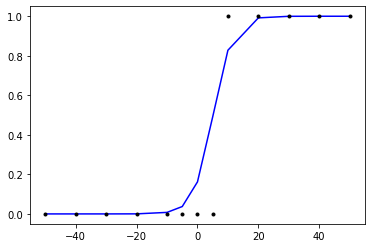

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(X, model.predict(X), 'b', X,y, 'k.')

X값이 5와 10사이의 어떤 값일때 y값이 0.5가 넘기 시작하는 것처럼 보입니다. 정확도가 100%가 나왔었기 때문에 적어도 X값이 5일때는 y값이 0.5보다 작고, X값이 10일 때는 y값이 0.5를 넘을 것입니다. 이제 X값이 5보다 작은 값일 때와 X값이 10보다 클 때에 대해서 y값을 출력해봅시다.

In [3]:
print(model.predict([1, 2, 3, 4, 4.5]))
print(model.predict([11, 21, 31, 41, 500]))

[[0.21056446]
 [0.26893088]
 [0.3365781 ]
 [0.41165975]
 [0.45106417]]
[[0.86912006]
 [0.9939878 ]
 [0.9997571 ]
 [0.9999902 ]
 [1.        ]]


X값이 5보다 작을 때는 0.5보다 작은 값을, X값이 10보다 클 때는 0.5보다 큰 값을 출력하는 것을 볼 수 있습니다.

